In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [44]:
df = pd.read_csv('./work/viikko5/datasets/housing.csv')

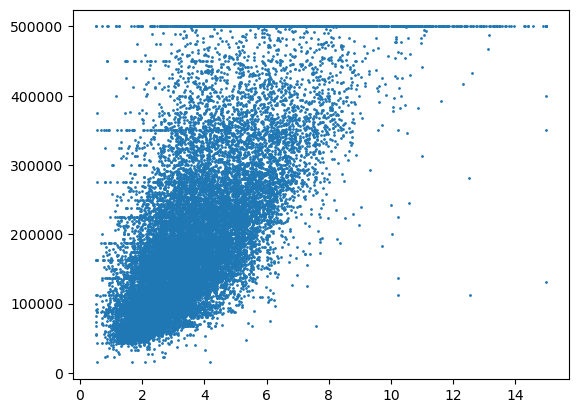

In [45]:
plt.scatter(x=df['median_income'], y=df['median_house_value'], s=1)
plt.show()

### Jaetaan testidata

In [46]:
X = df[['median_income']]
y = df[['median_house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Mallin opetus

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Suoran yhtälö

In [48]:
coef = model.coef_
inter = model.intercept_

print(f'Suoran yhtälö: MedianHouseValue = {coef[0]} * MedianIncome + {inter}')

Suoran yhtälö: MedianHouseValue = [42032.17769894] * MeidanIncome + [44320.63522766]


### Ennuste

In [49]:
y_pred = model.predict(X_test)

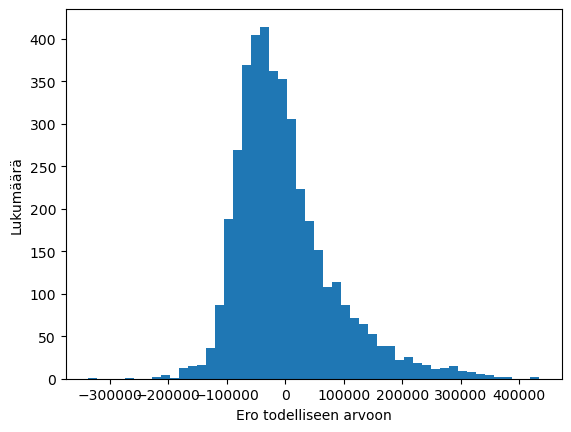

In [62]:
plt.hist(y_test - y_pred, bins=50)
plt.xlabel('Ero todelliseen arvoon')
plt.ylabel('Lukumäärä')
plt.show()

### Arvioidaan mallia

In [53]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'r2: {r2}')
print(f'mae: {mae}')
print(f'rmse: {rmse}')

r2: 0.4466846804895944
mae: 63521.30348040669
rmse: 84941.05152406936


In [54]:
print(f'Ennustettu talon arvo 30 000$ vuosituloilla: {model.predict([[30]])}')

Ennustettu talon arvo 30 000$ vuosituloilla: [[1305285.96619586]]


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
